<a href="https://colab.research.google.com/github/MaCuur/AI_EGs/blob/test/ejemplo_trafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# cargando datos
from scipy.io import loadmat
import h5py

filename = 'traffic_dataset.mat'

try:
    data = loadmat(filename)
    print("Loaded with scipy.io.loadmat")
except NotImplementedError:
    with h5py.File(filename, 'r') as f:
        print("Loaded with h5py (MATLAB v7.3+)")

Loaded with scipy.io.loadmat


In [ ]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'tra_X_tr', 'tra_X_te', 'tra_Y_tr', 'tra_Y_te', 'tra_adj_mat'])


In [ ]:
print(data['tra_X_tr'])

[[<Compressed Sparse Column sparse array of dtype 'float64'
  	with 540 stored elements and shape (36, 48)>
  <Compressed Sparse Column sparse array of dtype 'float64'
  	with 540 stored elements and shape (36, 48)>
  <Compressed Sparse Column sparse array of dtype 'float64'
  	with 540 stored elements and shape (36, 48)>             ...
  <Compressed Sparse Column sparse array of dtype 'float64'
  	with 540 stored elements and shape (36, 48)>
  <Compressed Sparse Column sparse array of dtype 'float64'
  	with 540 stored elements and shape (36, 48)>
  <Compressed Sparse Column sparse array of dtype 'float64'
  	with 540 stored elements and shape (36, 48)>            ]]


In [ ]:
print(data['tra_Y_tr'])

[[0.05091079 0.04764129 0.04483886 ... 0.37132181 0.42456796 0.42269967]
 [0.04624007 0.04950957 0.052312   ... 0.37085474 0.43811303 0.50116768]
 [0.05044372 0.04437179 0.05044372 ... 0.25502102 0.40168146 0.37926203]
 ...
 [0.02709014 0.01868286 0.02568893 ... 0.10322279 0.13872022 0.1424568 ]
 [0.03409622 0.02195236 0.03549743 ... 0.15787015 0.20364316 0.21064923]
 [0.04063522 0.02989257 0.05651565 ... 0.91032228 0.75198505 0.83839327]]


# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error. Then, process the data in "tra_X_tr", "tra_Y_tr", and "tra_adj_mat".

## Inspect data types and shapes

### Subtask:
Examine the data types and shapes of `tra_X_tr`, `tra_Y_tr`, and `tra_adj_mat` more thoroughly.


**Reasoning**:
Examine the data types and shapes of `tra_X_tr`, `tra_Y_tr`, and `tra_adj_mat` as instructed.



In [ ]:
import numpy as np

# 1. Print the data type of data['tra_X_tr']
print(f"Data type of data['tra_X_tr']: {type(data['tra_X_tr'])}")

# 2. Print the shape of the array containing the sparse matrices in data['tra_X_tr']
print(f"Shape of the array containing sparse matrices in data['tra_X_tr']: {data['tra_X_tr'].shape}")

# 3. Access one of the sparse matrices within data['tra_X_tr'] and print its data type and shape
first_sparse_matrix = data['tra_X_tr'][0, 0]
print(f"Data type of the first sparse matrix: {type(first_sparse_matrix)}")
print(f"Shape of the first sparse matrix: {first_sparse_matrix.shape}")

# 4. Print the data type of data['tra_Y_tr']
print(f"Data type of data['tra_Y_tr']: {type(data['tra_Y_tr'])}")

# 5. Print the shape of data['tra_Y_tr']
print(f"Shape of data['tra_Y_tr']: {data['tra_Y_tr'].shape}")

# 6. Print the data type of data['tra_adj_mat']
print(f"Data type of data['tra_adj_mat']: {type(data['tra_adj_mat'])}")

# 7. Print the shape of data['tra_adj_mat']
print(f"Shape of data['tra_adj_mat']: {data['tra_adj_mat'].shape}")

Data type of data['tra_X_tr']: <class 'numpy.ndarray'>
Shape of the array containing sparse matrices in data['tra_X_tr']: (1, 1261)
Data type of the first sparse matrix: <class 'scipy.sparse._csc.csc_array'>
Shape of the first sparse matrix: (36, 48)
Data type of data['tra_Y_tr']: <class 'numpy.ndarray'>
Shape of data['tra_Y_tr']: (36, 1261)
Data type of data['tra_adj_mat']: <class 'numpy.ndarray'>
Shape of data['tra_adj_mat']: (36, 36)


## Convert sparse data

### Subtask:
Convert the sparse arrays in `tra_X_tr` to a dense format if necessary for processing or modeling.


**Reasoning**:
Access the sparse arrays in `tra_X_tr`, iterate through them, convert each to a dense NumPy array, and store them in a list.



In [ ]:
# Access the array containing the sparse matrices
sparse_matrices_array = data['tra_X_tr'][0]

# Initialize a list to store the dense arrays
dense_matrices_list = []

# Iterate through each sparse matrix and convert to dense
for sparse_matrix in sparse_matrices_array:
    dense_matrix = sparse_matrix.toarray()
    dense_matrices_list.append(dense_matrix)

# Convert the list of dense arrays to a NumPy array for easier handling if needed
dense_matrices_array = np.array(dense_matrices_list)

print(f"Number of dense matrices converted: {len(dense_matrices_list)}")
print(f"Shape of the first dense matrix: {dense_matrices_list[0].shape}")
print(f"Shape of the resulting dense NumPy array (if converted): {dense_matrices_array.shape}")

Number of dense matrices converted: 1261
Shape of the first dense matrix: (36, 48)
Shape of the resulting dense NumPy array (if converted): (1261, 36, 48)


## Prepare data for modeling

### Subtask:
Depending on the specific processing goals, prepare the data for use in a machine learning model (e.g., splitting into training/validation/test sets, scaling).


**Reasoning**:
Split the dense feature array and the label array into training and validation sets using scikit-learn's train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    dense_matrices_array,
    data['tra_Y_tr'].T, # Transpose Y to match the number of samples dimension
    test_size=0.2,      # 20% for validation
    random_state=42     # for reproducibility
)

# Print the shapes of the resulting splits
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (1008, 36, 48)
Shape of X_val: (253, 36, 48)
Shape of y_train: (1008, 36)
Shape of y_val: (253, 36)


## Perform initial processing/analysis

### Subtask:
Based on the data types and structure, perform some initial processing or analysis steps.


**Reasoning**:
Calculate and print the mean and standard deviation for the training features and labels, and print the min and max of the adjacency matrix.



In [ ]:
# 1. Calculate and print the mean and standard deviation of the training features (X_train)
x_train_mean = np.mean(X_train)
x_train_std = np.std(X_train)
print(f"Mean of X_train: {x_train_mean}")
print(f"Standard deviation of X_train: {x_train_std}")

# 2. Calculate and print the mean and standard deviation of the training labels (y_train)
y_train_mean = np.mean(y_train)
y_train_std = np.std(y_train)
print(f"Mean of y_train: {y_train_mean}")
print(f"Standard deviation of y_train: {y_train_std}")

# 3. Print the minimum and maximum values of the adjacency matrix (data['tra_adj_mat'])
adj_mat_min = np.min(data['tra_adj_mat'])
adj_mat_max = np.max(data['tra_adj_mat'])
print(f"Minimum value of adjacency matrix: {adj_mat_min}")
print(f"Maximum value of adjacency matrix: {adj_mat_max}")

Mean of X_train: 0.22012507907015638
Standard deviation of X_train: 0.5797515217708965
Mean of y_train: 0.30291614100533215
Standard deviation of y_train: 0.19920847720105905
Minimum value of adjacency matrix: 0
Maximum value of adjacency matrix: 1


## Summary:

### Data Analysis Key Findings

*   `data['tra_X_tr']` is a NumPy ndarray of shape (1, 1261), containing sparse matrices. The first sparse matrix is a `scipy.sparse._csc.csc_array` with a shape of (36, 48).
*   `data['tra_Y_tr']` is a NumPy ndarray with a shape of (36, 1261).
*   `data['tra_adj_mat']` is a NumPy ndarray with a shape of (36, 36).
*   The sparse matrices in `data['tra_X_tr']` were successfully converted to a dense NumPy array of shape (1261, 36, 48).
*   The dense feature data (`dense_matrices_array`) and transposed label data (`data['tra_Y_tr'].T`) were split into training and validation sets.
    *   `X_train` shape: (1008, 36, 48)
    *   `X_val` shape: (253, 36, 48)
    *   `y_train` shape: (1008, 36)
    *   `y_val` shape: (253, 36)
*   Initial statistics were calculated:
    *   Mean of `X_train`: $\approx$ 0.220, Standard deviation of `X_train`: $\approx$ 0.580.
    *   Mean of `y_train`: $\approx$ 0.303, Standard deviation of `y_train`: $\approx$ 0.199.
    *   Minimum value of the adjacency matrix: 0, Maximum value of the adjacency matrix: 1.

### Insights or Next Steps

*   The data is now in a suitable format for use in a machine learning model, particularly one that can handle 3D input data like sequences or images, considering the shape of the feature matrices (36x48).
*   Given the nature of the adjacency matrix and the feature/label shapes, the data might be related to graph-based or spatial-temporal data analysis, potentially requiring models like Graph Neural Networks (GNNs) or convolutional models.


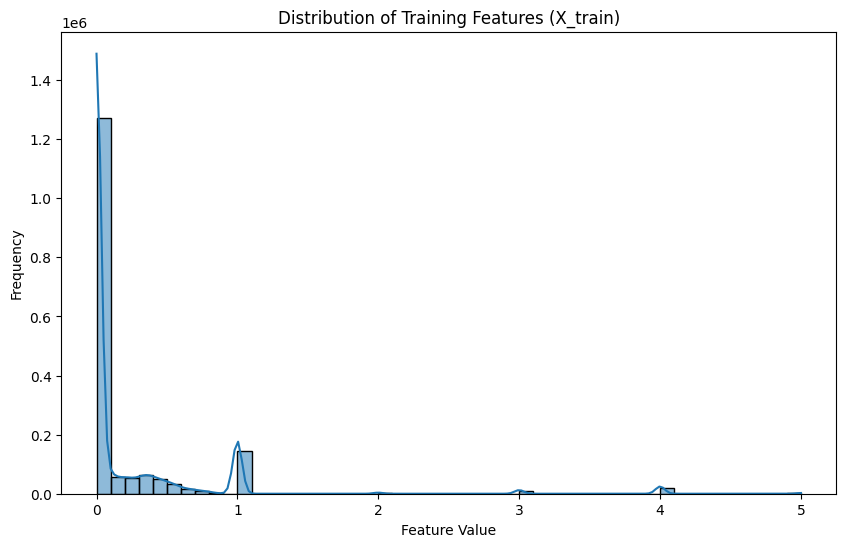

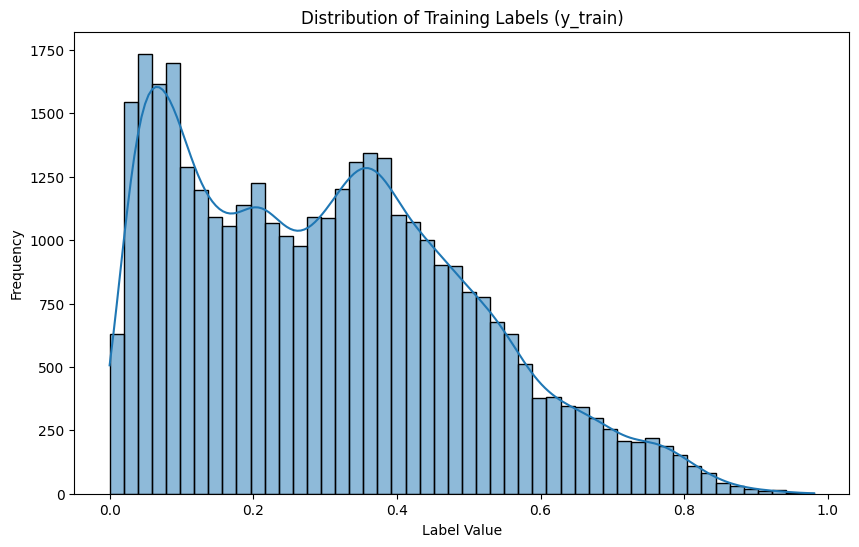

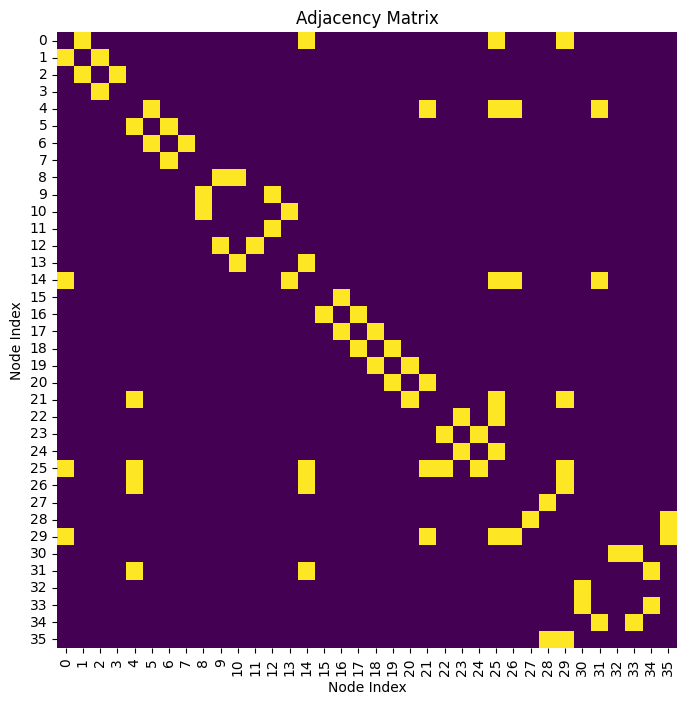

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten X_train for histogram
X_train_flat = X_train.flatten()

# Plot histogram of X_train distribution
plt.figure(figsize=(10, 6))
sns.histplot(X_train_flat, bins=50, kde=True)
plt.title('Distribution of Training Features (X_train)')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

# Flatten y_train for histogram
y_train_flat = y_train.flatten()

# Plot histogram of y_train distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_train_flat, bins=50, kde=True)
plt.title('Distribution of Training Labels (y_train)')
plt.xlabel('Label Value')
plt.ylabel('Frequency')
plt.show()

# Plot the adjacency matrix as a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(data['tra_adj_mat'], cmap='viridis', cbar=False)
plt.title('Adjacency Matrix')
plt.xlabel('Node Index')
plt.ylabel('Node Index')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Reshape X_train and X_val for scaling (StandardScaler expects 2D input)
# We'll flatten the last two dimensions (36, 48) into a single dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_val_scaled = scaler.transform(X_val_reshaped)

# Reshape the scaled data back to the original 3D shape
X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_val_scaled = X_val_scaled.reshape(X_val.shape)

print("Data scaled successfully.")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_val_scaled: {X_val_scaled.shape}")

Data scaled successfully.
Shape of X_train_scaled: (1008, 36, 48)
Shape of X_val_scaled: (253, 36, 48)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_stgnn_model(input_shape, adj_mat, num_time_steps_output):
    """
    Creates a basic Spatial-Temporal Graph Neural Network model.

    Args:
        input_shape (tuple): The shape of the input data (num_nodes, num_time_steps, num_features).
        adj_mat (np.ndarray): The adjacency matrix.
        num_time_steps_output (int): The number of future time steps to predict.

    Returns:
        tf.keras.models.Model: The STGNN model.
    """
    num_nodes, num_time_steps, num_features = input_shape

    # Input layer for the spatial-temporal features
    input_features = layers.Input(shape=(num_time_steps, num_nodes, num_features), name='input_features')

    # Input layer for the adjacency matrix (can be a constant or learned)
    # For simplicity, we'll treat it as a constant input here
    input_adj_mat = layers.Input(shape=(num_nodes, num_nodes), name='input_adj_mat')

    # --- Spatial Processing (Graph Convolution) ---
    # Reshape input for graph convolution (batch_size, num_nodes, num_time_steps * num_features)
    # This is a simplified approach; more complex models apply graph conv per time step
    spatial_input = layers.Reshape((num_nodes, num_time_steps * num_features))(input_features)

    # Basic Graph Convolutional Layer (simplified)
    # This requires a custom layer or using a library like Spektral
    # For demonstration, let's simulate a graph convolution like operation
    # by multiplying with the adjacency matrix (this is NOT a proper GCN)
    # A proper implementation would use spectral graph convolutions or message passing
    # You would typically use a library like Spektral for real GCN layers
    # from spektral.layers import GCNConv
    # graph_conv_output = GCNConv(channels=64)([spatial_input, input_adj_mat])

    # Placeholder for actual Graph Convolution (requires a GCN layer)
    # Let's use a dense layer per node as a proxy for spatial processing initially
    spatial_processed = layers.TimeDistributed(layers.Dense(64, activation='relu'))(input_features)


    # --- Temporal Processing (e.g., using Conv1D or LSTM) ---
    # Reshape for temporal processing (batch_size, num_time_steps, num_nodes * spatial_processed_features)
    temporal_input = layers.Reshape((num_time_steps, num_nodes * 64))(spatial_processed)

    # Temporal Convolutional Layer
    temporal_processed = layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='causal')(temporal_input)
    temporal_processed = layers.Dropout(0.2)(temporal_processed)
    temporal_processed = layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='causal')(temporal_processed)
    temporal_processed = layers.Dropout(0.2)(temporal_processed)


    # --- Output Layer ---
    # Flatten the output of the temporal processing
    flattened_output = layers.Flatten()(temporal_processed)

    # Dense layer to predict the future traffic conditions for all nodes
    output_layer = layers.Dense(num_nodes * num_time_steps_output, activation='linear')(flattened_output)

    # Reshape the output to (batch_size, num_nodes, num_time_steps_output)
    output_reshaped = layers.Reshape((num_nodes, num_time_steps_output))(output_layer)


    # Create the model
    # The model will take input_features and input_adj_mat, but our simplified layers only use input_features directly
    # A proper GNN integration would use input_adj_mat within the GCN layers
    model = models.Model(inputs=input_features, outputs=output_reshaped)

    return model

# Define model parameters
input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2], 1) # (num_nodes, num_time_steps, num_features) - assuming 1 feature per node per time step
num_time_steps_output = 1 # Predicting the next 1 time step
adj_mat = data['tra_adj_mat'] # Your adjacency matrix

# Create the model
stgnn_model = create_stgnn_model(input_shape, adj_mat, num_time_steps_output)

# Print the model summary
stgnn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_features (InputLayer)     │ (None, 48, 36, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 48, 36, 64)     │           128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 48, 2304)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 48, 128)        │       884,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 48, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6144)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │       221,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 36, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,155,492 (4.41 MB)

 Trainable params: 1,155,492 (4.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
stgnn_model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Using Mean Absolute Error as a metric as well

# Prepare data for training - Reshape X data to match model input shape (batch_size, num_time_steps, num_nodes, num_features)
# Current shape of X_train_scaled and X_val_scaled is (num_samples, num_nodes, num_time_steps)
# We need to reshape to (num_samples, num_time_steps, num_nodes, num_features)
# Assuming 1 feature per node per time step, we'll add a dimension for features.
X_train_reshaped_for_training = X_train_scaled.transpose(0, 2, 1).reshape(X_train_scaled.shape[0], X_train_scaled.shape[2], X_train_scaled.shape[1], 1)
X_val_reshaped_for_training = X_val_scaled.transpose(0, 2, 1).reshape(X_val_scaled.shape[0], X_val_scaled.shape[2], X_val_scaled.shape[1], 1)

# Prepare y data - The model outputs (batch_size, num_nodes, num_time_steps_output)
# Our y_train and y_val are (num_samples, num_nodes) and we are predicting 1 time step output.
# The output shape is already (num_samples, num_nodes) for a single time step prediction, which matches the model's output shape after reshaping.
# So y_train and y_val can be used directly.


print(f"Shape of X_train_reshaped_for_training: {X_train_reshaped_for_training.shape}")
print(f"Shape of X_val_reshaped_for_training: {X_val_reshaped_for_training.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")


# Train the model
history = stgnn_model.fit(
    X_train_reshaped_for_training,
    y_train,
    epochs=50, # You can adjust the number of epochs
    batch_size=32, # You can adjust the batch size
    validation_data=(X_val_reshaped_for_training, y_val)
)

Shape of X_train_reshaped_for_training: (1008, 48, 36, 1)
Shape of X_val_reshaped_for_training: (253, 48, 36, 1)
Shape of y_train: (1008, 36)
Shape of y_val: (253, 36)
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 359ms/step - loss: 0.0421 - mae: 0.1448 - val_loss: 0.0059 - val_mae: 0.0569
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mae: 0.0504 - val_loss: 0.0060 - val_mae: 0.0579
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mae: 0.0460 - val_loss: 0.0029 - val_mae: 0.0388
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mae: 0.0440 - val_loss: 0.0043 - val_mae: 0.0485
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mae: 0.0440 - val_loss: 0.0025 - val_mae: 0.0348
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mae: 0.0390 - val_loss: 0.0047 - val_mae: 0.0516
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mae: 0.0408 - val_loss: 0.0031 - val_mae: 0.0409
Epoch 8/50
32/32 

In [ ]:
# Make predictions on the validation data
predictions = stgnn_model.predict(X_val_reshaped_for_training)

print("Predictions made successfully.")
print(f"Shape of predictions: {predictions.shape}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step
Predictions made successfully.
Shape of predictions: (253, 36, 1)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reshape predictions to match y_val shape if necessary (currently predictions is (253, 36, 1) and y_val is (253, 36))
predictions_reshaped = predictions.reshape(predictions.shape[0], predictions.shape[1])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, predictions_reshaped)
print(f"Mean Absolute Error (MAE) on validation set: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val, predictions_reshaped)
print(f"Mean Squared Error (MSE) on validation set: {mse}")

Mean Absolute Error (MAE) on validation set: 0.03339557702635878
Mean Squared Error (MSE) on validation set: 0.002223739067355948


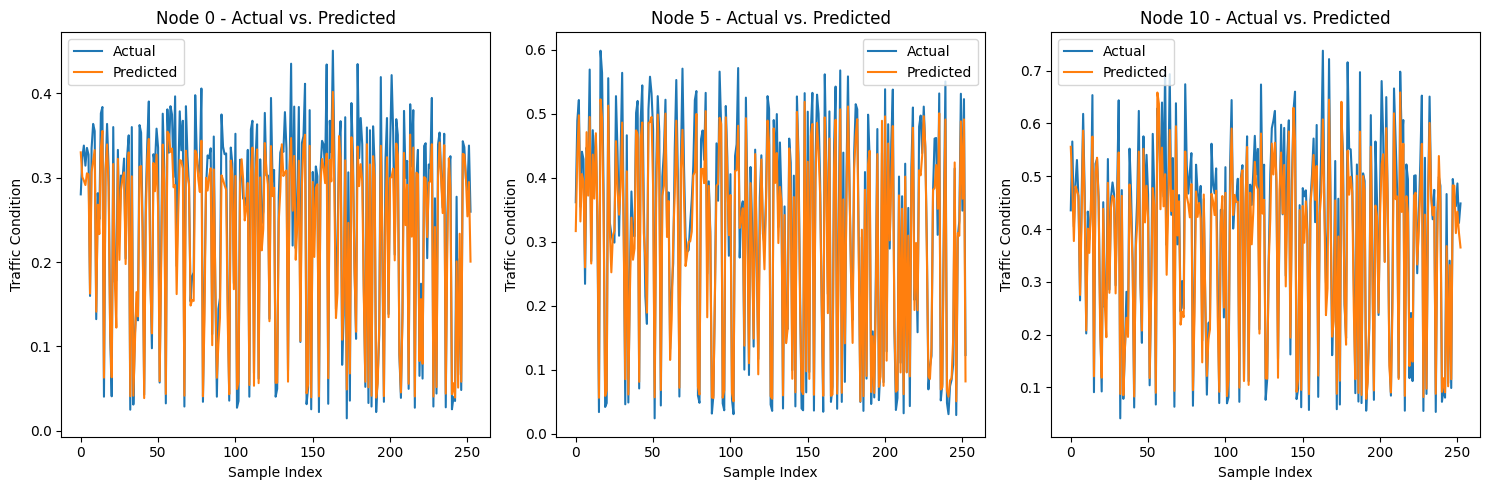

In [ ]:
# Select a few nodes to visualize
node_indices_to_plot = [0, 5, 10] # You can change these indices

plt.figure(figsize=(15, 5))

for i, node_idx in enumerate(node_indices_to_plot):
    plt.subplot(1, len(node_indices_to_plot), i + 1)
    plt.plot(y_val[:, node_idx], label='Actual')
    plt.plot(predictions_reshaped[:, node_idx], label='Predicted')
    plt.title(f'Node {node_idx} - Actual vs. Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel('Traffic Condition')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Save the entire model in the TensorFlow SavedModel format
stgnn_model.save('my_stgnn_model.keras')

print("Model saved successfully.")

Model saved successfully.
